In [1]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt

### Load all images from Dataset1 and create labels

In [4]:
list_file=[]
for root, subdirs, files in os.walk('/storage/Crack_detection/Dataset1'):
    for name in files:
        list_file.append(os.path.join(root, name))

In [8]:
# load all images
dataset1=[cv2.imread(list_file[i]) for i in range(len(list_file)) if list_file[i].find('jpg') != -1]
dataset1_labels=[list_file[i].split('/')[-2] for i in range(len(list_file)) if list_file[i].find('jpg') != -1]

In [ ]:
# load a subset of images
#dataset1=[cv2.imread(list_file[i]) for i in range(0, len(list_file), 100) if list_file[i].find('jpg') != -1]
#dataset1_labels=[list_file[i].split('/')[-2] for i in range(0, len(list_file), 100) if list_file[i].find('jpg') != -1]

In [9]:
n_pos=len([i for i in dataset1_labels if i =='Positive'])
n_neg=len([i for i in dataset1_labels if i =='Negative'])
dataset1_info={'Image with crack': n_pos, 
               'Image without crack': n_neg,
              'Image size': str(dataset1[0].shape[0]) +' x ' + str(dataset1[0].shape[1]) + ' x ' + str(dataset1[0].shape[2])}
dataset1_info=pd.Series(dataset1_info)
dataset1_info.T

Image with crack               20000
Image without crack            19999
Image size             227 x 227 x 3
dtype: object

### Plot 40 images randomly selected

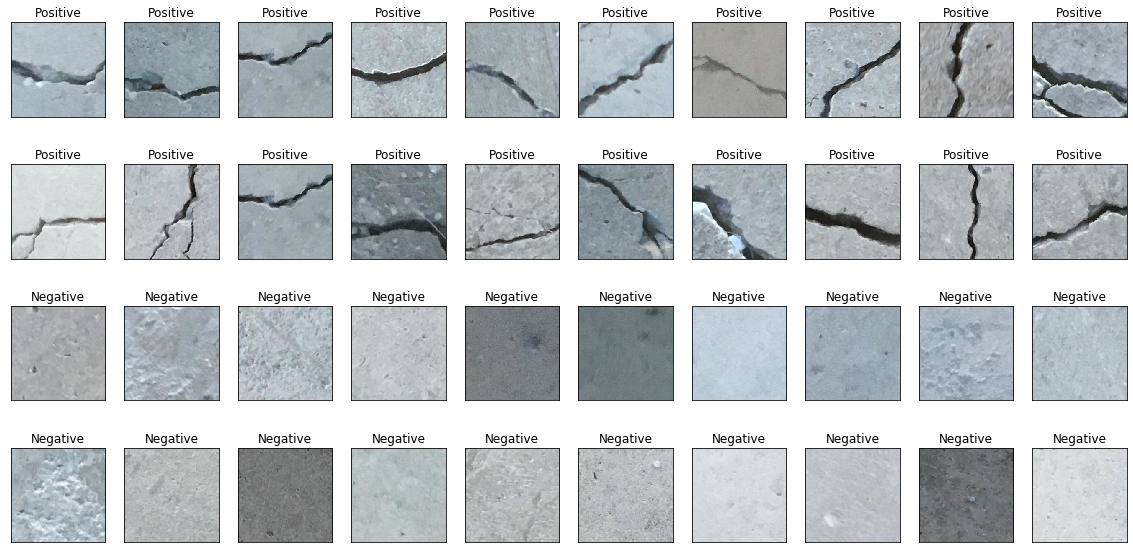

In [10]:
rnd_positive=np.random.randint(n_pos, size=20)
rnd_negative=np.random.randint(n_pos, n_pos+n_neg, size=20)
rnd_images=np.concatenate((rnd_positive, rnd_negative))
plt.figure(figsize=(20,10))
#plt.subplots_adjust(hspace =0.1)
image_idx=1
for idx in rnd_images:
    plt.subplot(4,10,image_idx)
    plt.imshow(dataset1[idx])
    plt.title(dataset1_labels[idx])
    plt.xticks([])
    plt.yticks([])
    image_idx+=1
plt.show()

## Load all images from Dataset2 and create labels

In [11]:
list_file=[]
for root, subdirs, files in os.walk('/storage/Crack_detection/Dataset2'):
    for name in files:
        list_file.append(os.path.join(root, name))

In [12]:
# load all images
dataset2=[cv2.imread(list_file[i]) for i in range(len(list_file)) if list_file[i].find('jpg') != -1]
dataset2_labels=[list_file[i].split('/')[-2] for i in range(len(list_file)) if list_file[i].find('jpg') != -1]
dataset2_class=[list_file[i].split('/')[-3] for i in range(len(list_file)) if list_file[i].find('jpg') != -1]

In [ ]:
# load a subset of images
dataset2=[cv2.imread(list_file[i]) for i in range(0, len(list_file),50) if list_file[i].find('jpg') != -1]
dataset2_labels=[list_file[i].split('/')[-2] for i in range(0, len(list_file), 50) if list_file[i].find('jpg') != -1]
dataset2_class=[list_file[i].split('/')[-3] for i in range(0, len(list_file), 50) if list_file[i].find('jpg') != -1]

In [14]:
dataset2_df=pd.DataFrame({'class' : dataset2_class, 'labels': dataset2_labels, 'image':dataset2})
print(dataset2_df.pivot_table( index=['class'], columns='labels',  aggfunc='count'))
print('Images size: ', str(dataset2[0].shape[0]) +' x ' + str(dataset2[0].shape[1]) + ' x ' + str(dataset2[0].shape[2]))

            image            
labels    Cracked Non-cracked
class                        
Decks        2025       11595
Pavements    2608       21726
Walls        3851       14287
Images size:  256 x 256 x 3


### Plot 60 images randomly selected

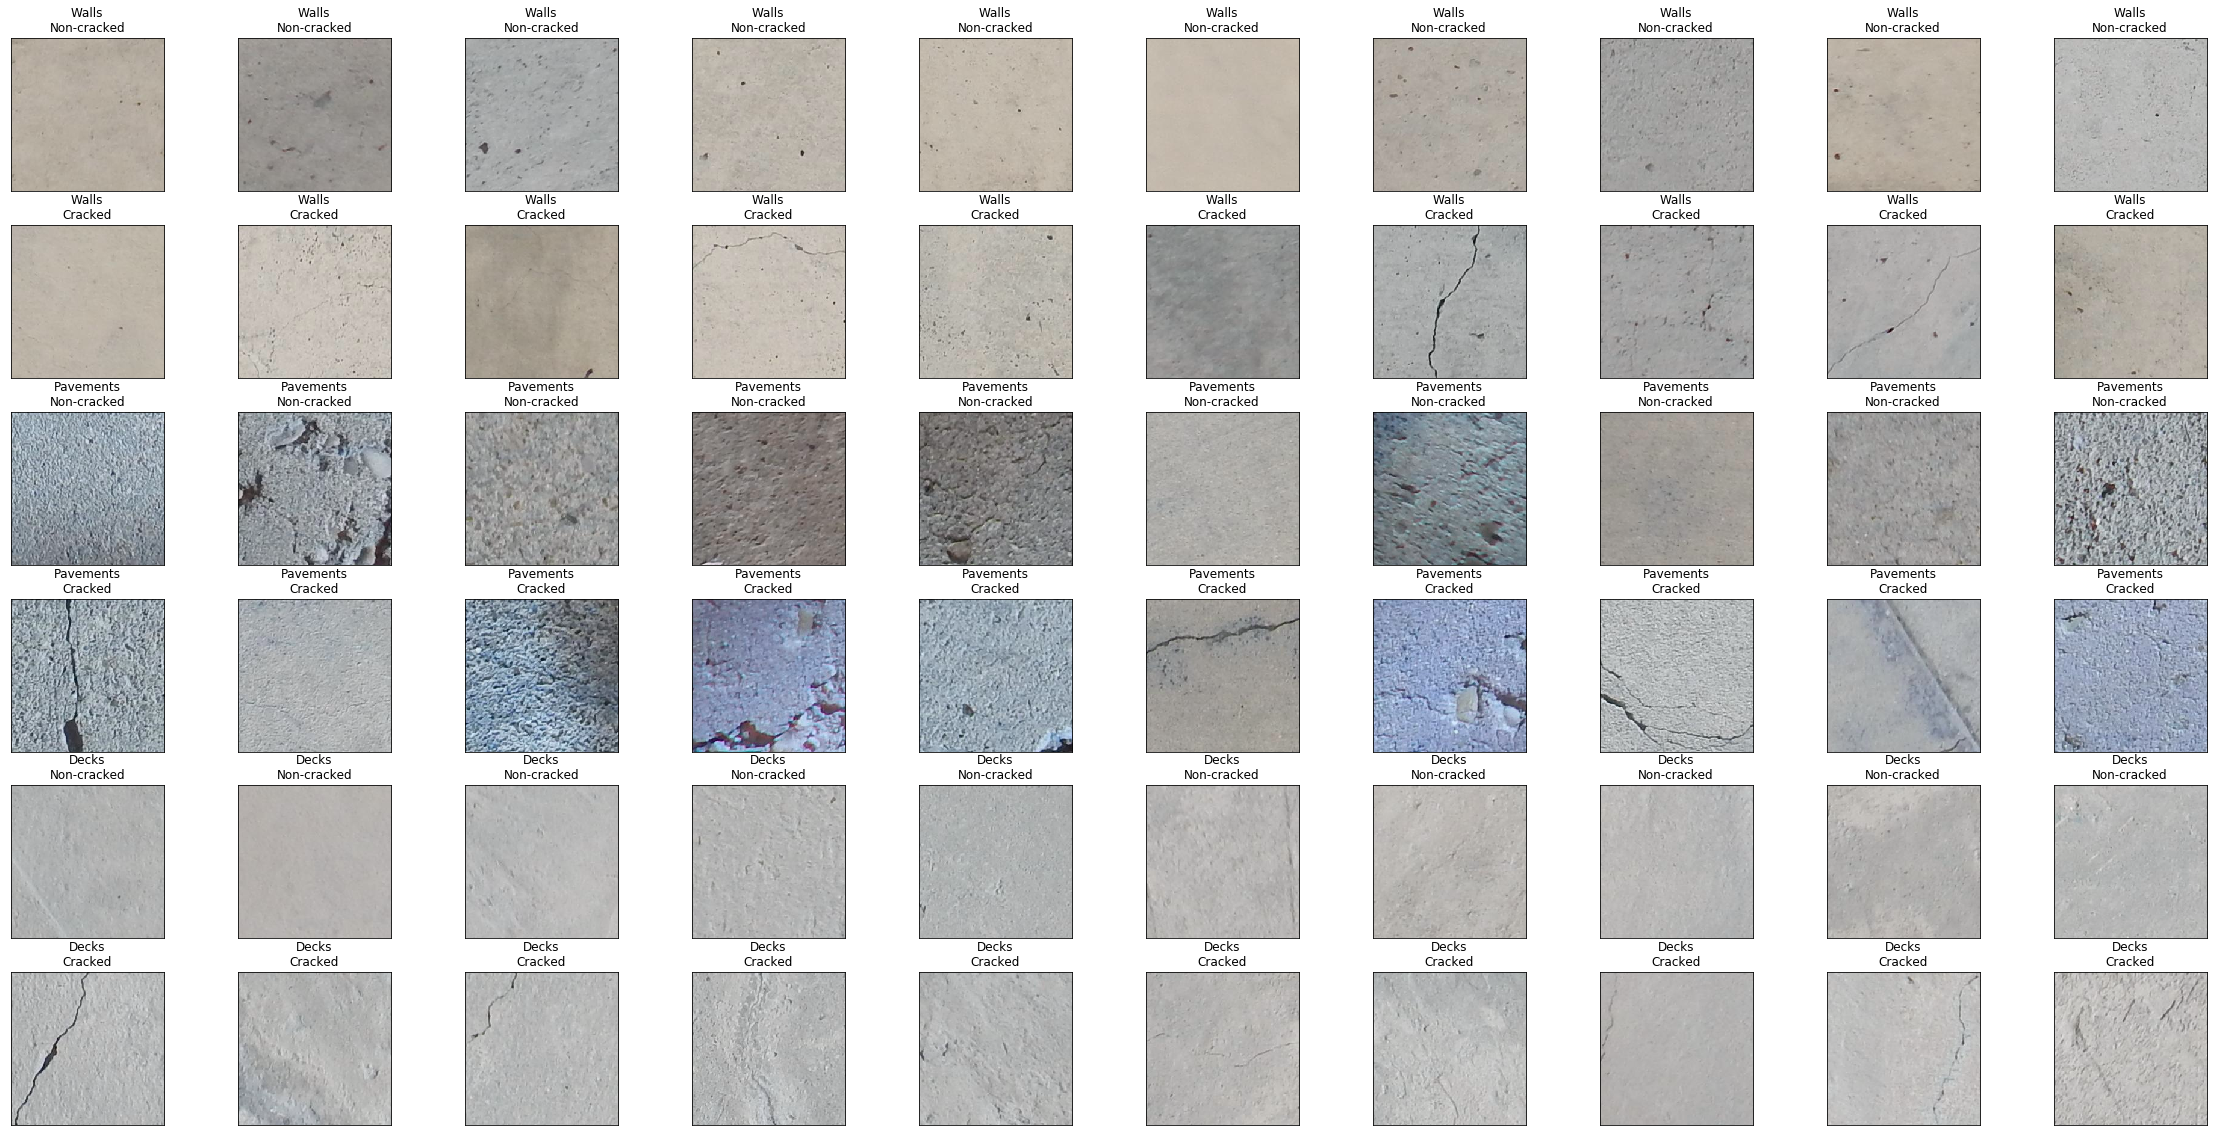

In [26]:
idx_w_nc_start=dataset2_df.loc[(dataset2_df['class'] =='Walls') & (dataset2_df['labels']=='Non-cracked')].index.min()
idx_w_nc_end=dataset2_df.loc[(dataset2_df['class'] =='Walls') & (dataset2_df['labels']=='Non-cracked')].index.max()
idx_w_c_start=dataset2_df.loc[(dataset2_df['class'] =='Walls') & (dataset2_df['labels']=='Cracked')].index.min()
idx_w_c_end=dataset2_df.loc[(dataset2_df['class'] =='Walls') & (dataset2_df['labels']=='Cracked')].index.max()

idx_p_nc_start=dataset2_df.loc[(dataset2_df['class'] =='Pavements') & (dataset2_df['labels']=='Non-cracked')].index.min()
idx_p_nc_end=dataset2_df.loc[(dataset2_df['class'] =='Pavements') & (dataset2_df['labels']=='Non-cracked')].index.max()
idx_p_c_start=dataset2_df.loc[(dataset2_df['class'] =='Pavements') & (dataset2_df['labels']=='Cracked')].index.min()
idx_p_c_end=dataset2_df.loc[(dataset2_df['class'] =='Pavements') & (dataset2_df['labels']=='Cracked')].index.max()

idx_d_nc_start=dataset2_df.loc[(dataset2_df['class'] =='Decks') & (dataset2_df['labels']=='Non-cracked')].index.min()
idx_d_nc_end=dataset2_df.loc[(dataset2_df['class'] =='Decks') & (dataset2_df['labels']=='Non-cracked')].index.max()
idx_d_c_start=dataset2_df.loc[(dataset2_df['class'] =='Decks') & (dataset2_df['labels']=='Cracked')].index.min()
idx_d_c_end=dataset2_df.loc[(dataset2_df['class'] =='Decks') & (dataset2_df['labels']=='Cracked')].index.max()

idx_w_nc=np.random.randint(idx_w_nc_start, idx_w_nc_end, size=10)
idx_w_c=np.random.randint(idx_w_c_start, idx_w_c_end, size=10)
idx_p_nc=np.random.randint(idx_p_nc_start, idx_p_nc_end, size=10)
idx_p_c=np.random.randint(idx_p_c_start, idx_p_c_end, size=10)
idx_d_nc=np.random.randint(idx_d_nc_start, idx_d_nc_end, size=10)
idx_d_c=np.random.randint(idx_d_c_start, idx_d_c_end, size=10)
idx_image_rnd=np.concatenate((idx_w_nc, idx_w_c, idx_p_nc, idx_p_c, idx_d_nc, idx_d_c))
plt.figure(figsize=(40,20))
plt.subplots_adjust(hspace =0.22)
image_idx=1
for idx in idx_image_rnd:
    plt.subplot(6,10,image_idx)
    plt.imshow(dataset2_df.iloc[idx]['image'])
    plt.title(dataset2_class[idx]+"\n"+dataset2_labels[idx])
    plt.xticks([])
    plt.yticks([])
    image_idx+=1
plt.show()